# Basics Node and BST classes

In [79]:
from graphviz import Graph, Digraph

In [80]:
class Node():
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.left = None
        self.right = None

In [83]:
class BST():
    def __init__(self):
        self.root = None
        self.size = 0
    
    def __len__(self):
        return self.size
    
    def __setitem__(self, key, val):
        self.add(key,val)
    
    def add(self, key, val):
        if self.root == None:
            self.root = Node(key,val)
            self.size += 1
        start = self.root
        while True:
            if key == start.key:
                start.val = val
                return
            elif key < start.key:
                if start.left == None:
                    start.left = Node(key, val)
                    self.size += 1
                    return
                start = start.left
            else:
                if start.right == None:
                    start.right = Node(key,val)
                    self.size += 1
                    return
                start = start.right
                
    def __dump(self, node):
        if node == None:
            return
        self.__dump(node.left)          # C 
        print(node.key, ": ", node.val) # B
        self.__dump(node.right)         # A
        
    def dump(self):
        self.__dump(self.root)
        
    def __lookup(self, node, key):
        if node == None:
            return None # default
        elif node.key == key:
            return node.val
        elif key < node.key:
            return self.__lookup(node.left, key)
        else:
            assert key > node.key
            return self.__lookup(node.right, key)

    def __getitem__(self, key):
        return self.__lookup(self.root, key)
    
    # Visualization
    def __graphviz(self, g, node):
        g.node(node.key)
        for label, child in [("L", node.left), ("R", node.right)]:
            if child != None:
                self.__graphviz(g, child)
                g.edge(node.key, child.key, label=label)
    
    def _repr_svg_(self):
        g = Digraph()
        if self.root != None:
            self.__graphviz(g, self.root)
        return g._repr_svg_()

In [70]:
t = BST()
t.add("B", 3)
assert t.size == 1
t.add("A", 2)
assert t.size == 2
t.add("C", 1)
assert t.size == 3
t.add("C", 4)
assert t.size == 3

# Length

In [71]:
t = BST()
t.add("B", 3)
assert len(t) == 1
t.add("A", 2)
assert len(t) == 2
t.add("C", 1)
assert len(t) == 3
t.add("C", 4)
assert len(t) == 3

# Dump


In [72]:
t.dump()

A :  2
B :  3
C :  4


# Bracket Syntax


In [73]:
t = BST()
t["B"] = 3
t["A"] = 2
t["C"] = 1
t["C"] = 4
t.dump()

A :  2
B :  3
C :  4


In [74]:
t = BST()

# test default
print(t["default"])

# test root
t["B"] = 1
print(t["B"])

# test right child
t["C"] = 2
print(t["C"])

# test update
t["B"] = 3
print(t["B"])

t["A"] = 7
print(t["A"])

None
1
2
3
7


# Balance

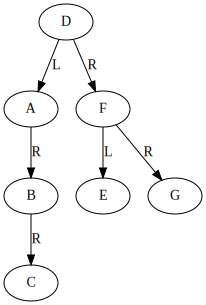

In [82]:
t = BST()
t["D"] = 9
t["A"] = 8
t["B"] = 7
t["C"] = 6
t["F"] = 5
t["E"] = 4
t["G"] = 3
t

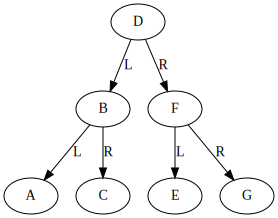

In [85]:
t = BST()
t["D"] = 9
t["B"] = 7
t["F"] = 5
t["A"] = 8
t["C"] = 6
t["E"] = 4
t["G"] = 3
t

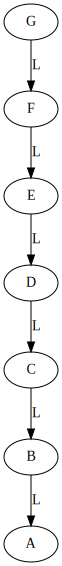

In [86]:
t = BST()
t["G"] = 3
t["F"] = 5
t["E"] = 4
t["D"] = 9
t["C"] = 6
t["B"] = 7
t["A"] = 8
t